In [1]:
import numpy as np
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Loading the VGG16 features and the mnist dataset

In [2]:
vgg16_train_features = np.loadtxt('vgg16_train_features.out', dtype='float32', delimiter=' ')

In [3]:
vgg16_test_features = np.loadtxt('vgg16_test_features.out', dtype='float32', delimiter=' ')

In [5]:
# simple_ann_train_features = np.loadtxt('simple_ann_train_feature.out', dtype='float32', delimiter=' ')

In [6]:
# simple_ann_test_features = np.loadtxt('simple_ann_test_features.out', dtype='float32', delimiter=' ')

In [7]:
(_, y_train), (_, y_test) = mnist.load_data()

In [8]:
y_train = tf.keras.utils.to_categorical(
    y_train, dtype='float32'
)

In [9]:
y_test = tf.keras.utils.to_categorical(
    y_test, dtype='float32'
)

Creating the regression model

In [10]:
model = Sequential()

model.add(Dense(512, input_shape=(512,)))
model.add(Dropout(0.05))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(10, activation='softmax'))

earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=32)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(vgg16_train_features,
                    y_train,
                    epochs=250, 
                    batch_size=32, 
                    verbose=0, 
                    validation_split=0.2, 
                    callbacks=[earlyStopping])

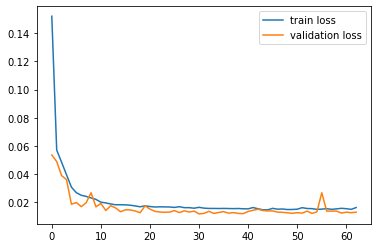

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [12]:
test_results = model.evaluate(vgg16_test_features, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0123 - mse: 0.0123


In [13]:
predictions = model.predict(vgg16_test_features)

In [14]:
l = []
for y, p in zip(y_test, predictions): 
    l.append(y - p)

(array([1.5000e+01, 6.5000e+01, 8.9000e+01, 1.0100e+02, 8.3000e+01,
        7.1000e+01, 7.6000e+01, 9.8000e+01, 9.7000e+01, 1.6300e+02,
        2.5900e+02, 4.6200e+02, 1.8360e+03, 3.8214e+04, 5.2453e+04,
        1.7060e+03, 2.3910e+03, 5.9200e+02, 1.9400e+02, 9.6000e+01,
        9.8000e+01, 1.0100e+02, 8.7000e+01, 9.7000e+01, 7.7000e+01,
        8.7000e+01, 1.3200e+02, 2.4400e+02, 1.2000e+01, 4.0000e+00]),
 array([-1.0439028 , -0.9700232 , -0.8961436 , -0.8222641 , -0.74838454,
        -0.67450494, -0.6006254 , -0.52674586, -0.4528663 , -0.37898672,
        -0.30510715, -0.23122759, -0.15734804, -0.08346847, -0.00958892,
         0.06429064,  0.1381702 ,  0.21204977,  0.28592932,  0.3598089 ,
         0.43368843,  0.507568  ,  0.58144754,  0.65532714,  0.7292067 ,
         0.8030862 ,  0.8769658 ,  0.95084536,  1.024725  ,  1.0986044 ,
         1.172484  ], dtype=float32),
 <BarContainer object of 30 artists>)

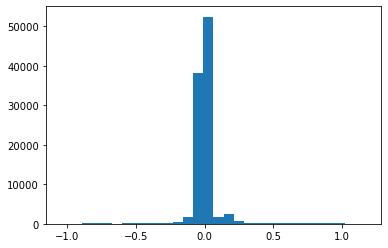

In [15]:
plt.hist(np.array(l).flatten(), bins=30)

In [16]:
train = model.evaluate(vgg16_train_features, y_train, verbose=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - mse: 0.0124


In [ ]:
predictions = model.predict(vgg16_train_features)

In [18]:
l = []
for y, p in zip(y_train, predictions): 
    l.append(y - p)

(array([5.0000e+00, 4.4000e+01, 6.7300e+02, 3.3930e+03, 1.6210e+03,
        2.0250e+03, 4.9200e+02, 2.1400e+02, 1.6000e+02, 2.0200e+02,
        1.7700e+02, 3.0400e+02, 3.2100e+02, 7.4300e+02, 5.3370e+03,
        7.2853e+04, 1.8740e+03, 3.8400e+02, 8.9000e+01, 3.3000e+01,
        1.4000e+01, 2.5000e+01, 1.7000e+01, 2.7000e+01, 3.3000e+01,
        5.2000e+01, 1.6700e+02, 3.9320e+03, 4.7610e+03, 2.8000e+01]),
 array([-1.2506632 , -1.170574  , -1.0904847 , -1.0103955 , -0.9303064 ,
        -0.85021716, -0.77012795, -0.69003874, -0.6099495 , -0.5298603 ,
        -0.44977114, -0.36968192, -0.2895927 , -0.20950352, -0.1294143 ,
        -0.04932511,  0.0307641 ,  0.1108533 ,  0.1909425 ,  0.2710317 ,
         0.35112092,  0.4312101 ,  0.5112993 ,  0.5913885 ,  0.67147774,
         0.75156695,  0.83165616,  0.9117453 ,  0.9918345 ,  1.0719237 ,
         1.152013  ], dtype=float32),
 <BarContainer object of 30 artists>)

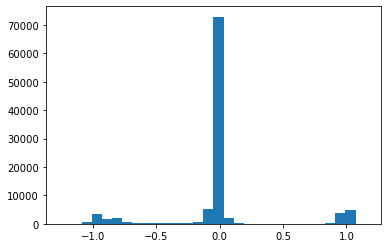

In [19]:
plt.hist(np.array(l).flatten(), bins=30)